# Inferência Bayseana - Notas de aula

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from random import choice

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from datass.dataframe.inspection import _isnull

%matplotlib notebook

___
## # Aula 01 - 24/08/2021

In [2]:
None

___
## # Aula 02 - 31/08/2021

## Distribuição

In [3]:
df = pd.read_csv('vehicles.csv')
df.shape

(426880, 26)

In [4]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### A partir de agora, vamos trabalhar com o atributo `price`.

In [8]:
df[pd.isnull(df['price'])].shape[0]

0

In [9]:
_ = stats.mode(df['price'])
print(f'Coluna: "price"\nModa: {_[0][0]}\nQuantidade: {_[1][0]}')

Coluna: "price"
Moda: 0
Quantidade: 32895


In [10]:
precos = df['price'].to_numpy()
precos.sort()

type(precos), precos.shape

(numpy.ndarray, (426880,))

In [11]:
[_ for _ in precos[::int(len(precos)/15)]]

[0,
 0,
 2500,
 4500,
 6000,
 7995,
 9995,
 12500,
 14997,
 17990,
 21396,
 25000,
 29777,
 34590,
 40600,
 987654321]

In [12]:
PERCENTIL = 0.01

percentil_inf = PERCENTIL
percentil_sup = 1 - PERCENTIL

menor_indice = int(len(precos) * percentil_inf)
maior_indice = int(len(precos) * percentil_sup)

len(precos), menor_indice, maior_indice

(426880, 4268, 422611)

In [17]:
amostra_sem_outliers = precos[menor_indice:maior_indice]

print(
    f'Removidos: {len(precos) - len(amostra_sem_outliers)}\n'
    + f'Sem outliers: {len(amostra_sem_outliers)}'
)

Removidos: 8537
Sem outliers: 418343


In [18]:
amostra_sem_outliers[::int(len(amostra_sem_outliers)/15)]

array([    0,     0,  2700,  4700,  6400,  7995,  9995, 12500, 14995,
       17990, 20995, 24995, 28996, 33990, 39990, 66995])

<IPython.core.display.Javascript object>


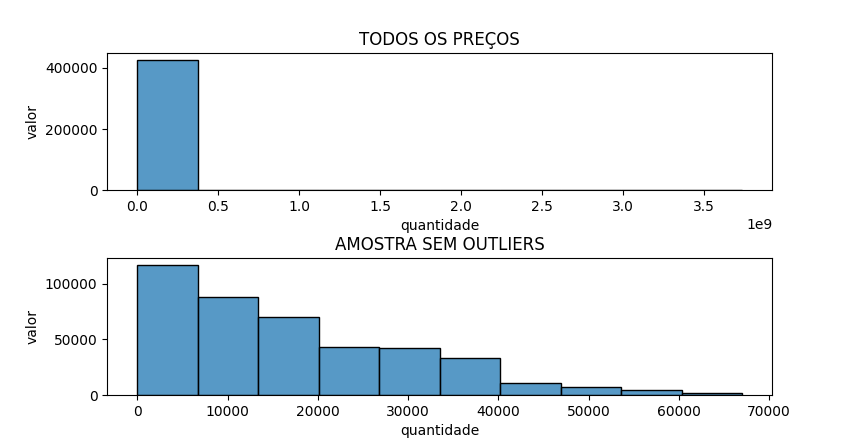

In [19]:
PLT_ROWS, PLT_COLS, PLT_INDEX = 2, 1, 1

_ = zip(('todos os preços', 'amostra sem outliers'), (precos, amostra_sem_outliers))
for titulo, dados in _:
    plt.subplot(PLT_ROWS, PLT_COLS, PLT_INDEX)
    sns.histplot(data=dados, bins=10)
    plt.title(titulo.upper())
    plt.xlabel('quantidade')
    plt.ylabel('valor')
    PLT_INDEX += 1

plt.subplots_adjust(wspace=0.25, hspace=0.50)
plt.show()

### Normalizar os dados

In [20]:
scaler_precos = StandardScaler().fit(amostra_sem_outliers.reshape(-1, 1))
scaler_precos

StandardScaler()

In [21]:
precos_normalizados = scaler_precos.transform(amostra_sem_outliers.reshape(-1, 1))

[_ for _ in precos_normalizados[::int(len(precos_normalizados)/15)]]

[array([-1.23096557]),
 array([-1.23096557]),
 array([-1.03468607]),
 array([-0.88929386]),
 array([-0.76571047]),
 array([-0.64976018]),
 array([-0.50436796]),
 array([-0.32226421]),
 array([-0.14088742]),
 array([0.07683742]),
 array([0.29528923]),
 array([0.58607366]),
 array([0.87693079]),
 array([1.23997515]),
 array([1.6761518]),
 array([3.6393102])]

In [22]:
print(
    '# Preços normalizados'
    + f'\nMédia: {precos_normalizados.mean():.4f}'
    + f'\nDesvio padrão: {precos_normalizados.std():.4f}'
    + f'\nMin: {precos_normalizados.min():.4f}'
    + f'\nMax: {precos_normalizados.max():.4f}'
)

# Preços normalizados
Média: 0.0000
Desvio padrão: 1.0000
Min: -1.2310
Max: 3.6393


<IPython.core.display.Javascript object>


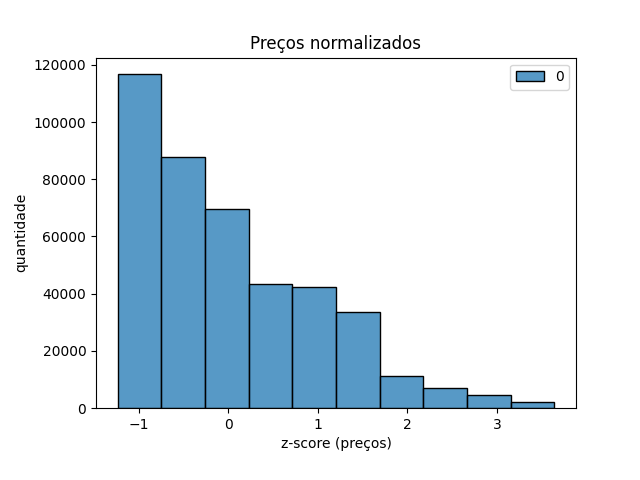

In [23]:
sns.histplot(precos_normalizados, bins=10)
plt.title('Preços normalizados')
plt.xlabel('z-score (preços)')
plt.ylabel('quantidade')

plt.subplots_adjust(bottom=0.15, left=0.15)
plt.show()

Provavelmente se trata de uma distribuição exponencial

In [24]:
bins_percentil = np.linspace(start=0, stop=100, num=11)

bins_percentil # extremos dos intervalos

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [25]:
valores_percentil = np.percentile(a=precos_normalizados, q=bins_percentil)

valores_percentil # valores de cada supremo dos intervalos

array([-1.23096557, -1.15863294, -0.88929386, -0.7221655 , -0.50436796,
       -0.21685486,  0.07683742,  0.44068144,  0.87700348,  1.42898503,
        3.6393102 ])

In [26]:
freq_precos, bins_precos = np.histogram(precos_normalizados, bins=valores_percentil)

freq_precos, bins_precos

(array([41818, 41847, 41220, 41574, 42516, 42002, 41413, 42281, 40595,
        43077]),
 array([-1.23096557, -1.15863294, -0.88929386, -0.7221655 , -0.50436796,
        -0.21685486,  0.07683742,  0.44068144,  0.87700348,  1.42898503,
         3.6393102 ]))

<IPython.core.display.Javascript object>


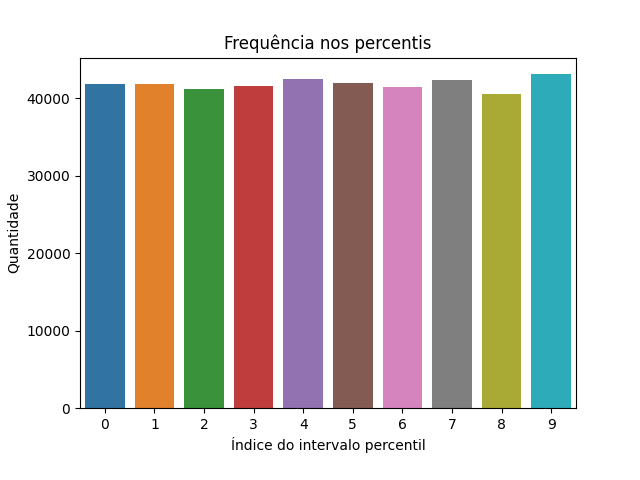

In [31]:
sns.barplot(x=[*range(len(freq_precos))], y=freq_precos)
plt.title('Frequência nos percentis')
plt.ylabel('Quantidade')
plt.xlabel('Índice do intervalo percentil')
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>


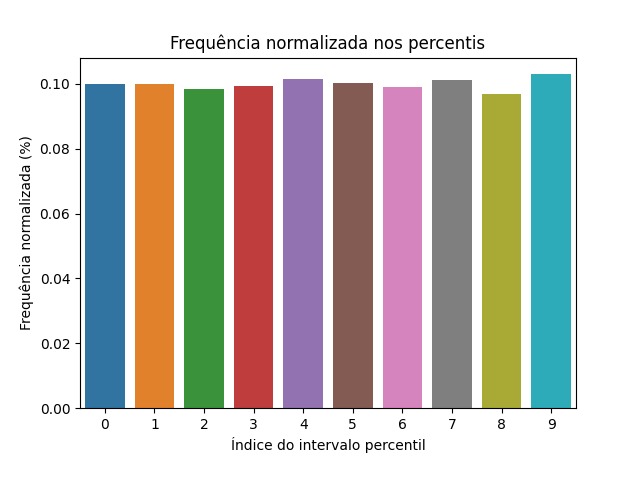

In [32]:
sns.barplot(x=[*range(len(freq_precos))], y=freq_precos/sum(freq_precos))
plt.title('Frequência normalizada nos percentis')
plt.ylabel('Frequência normalizada (%)')
plt.xlabel('Índice do intervalo percentil')
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>


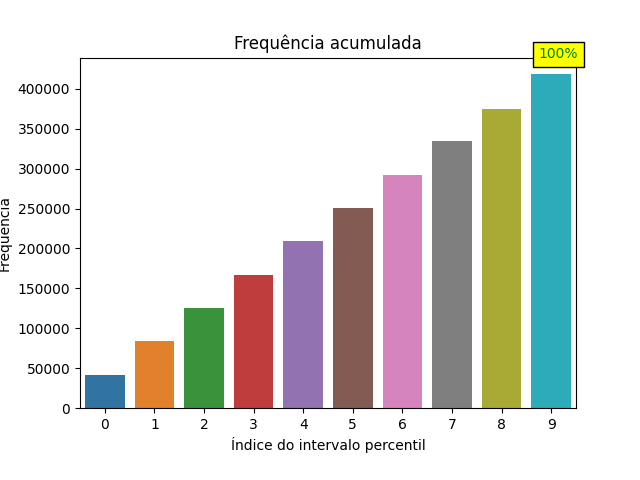

In [33]:
frequencia_precos_acumulada = np.cumsum(freq_precos)

sns.barplot(x=[*range(len(freq_precos))], y=frequencia_precos_acumulada)
plt.title('Frequência acumulada')
plt.ylabel('Frequência')
plt.xlabel('Índice do intervalo percentil')
plt.text(x=8.75, y=frequencia_precos_acumulada[-1]+2e4, s='100%',
         backgroundcolor='yellow',
         fontdict=dict(color='green',size=10),
         bbox=dict(facecolor='yellow')
        )
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>


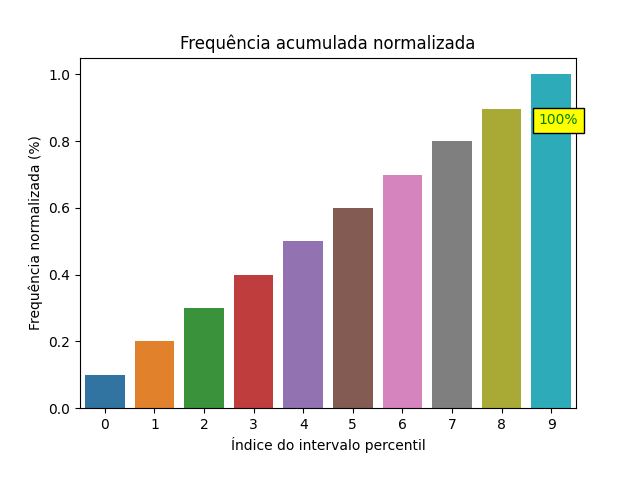

In [34]:
sns.barplot(x=[*range(len(freq_precos))], y=frequencia_precos_acumulada/sum(freq_precos))
plt.title('Frequência acumulada normalizada')
plt.ylabel('Frequência normalizada (%)')
plt.xlabel('Índice do intervalo percentil')
plt.text(x=8.75, y=0.85, s='100%',
         backgroundcolor='yellow',
         fontdict=dict(color='green',size=10),
         bbox=dict(facecolor='yellow')
        )
plt.subplots_adjust(bottom=0.15)
plt.show()

### Chi-quadrado

Realizaremos um teste `Chi-quadrado`: Encontrar o tipo de distribuição que mais se aproxima ao nosso conjunto de dados

In [35]:
CHI_QUADRADO = []

DISTRIBUICOES = ['beta', 'expon', 'gamma', 'invgauss', 'lognorm', 'norm',
                 'pearson3', 'triang', 'uniform', 'weibull_max', 'weibull_min']

In [36]:
CHI_QUADRADO_METRICAS = []
PARAMS_DISTS = {}

for d in DISTRIBUICOES:
    dist = getattr(scipy.stats, d)

    params = dist.fit(precos_normalizados)
    PARAMS_DISTS[d] = params
#     print(f'Distribuição: {d.upper()}.\n\tParams MLE: {params}')

    cdf_fitted = dist.cdf(valores_percentil, *params)

    frequencia_esperada = []
    for b in range(len(bins_percentil) - 1):
        delta_area_cdf_esperada = cdf_fitted[b + 1] - cdf_fitted[b]
        frequencia_esperada.append(delta_area_cdf_esperada)

    frequencia_esperada = np.array(frequencia_esperada) * len(amostra_sem_outliers)
    frequencia_esperada_acc = np.cumsum(frequencia_esperada)
    
    ss = ((frequencia_esperada_acc - frequencia_precos_acumulada)**2)/frequencia_esperada_acc
    ss = round(sum(ss, 0))
    CHI_QUADRADO_METRICAS.append(ss)

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [37]:
for k, v in PARAMS_DISTS.items():
    print(f'Distribuição: {k.upper()}.\nParams MLE: {v}\n')

Distribuição: BETA.
Params MLE: (0.2388065831255009, 1.1637717506536793, -1.2309655655757914, 4.875420610758933)

Distribuição: EXPON.
Params MLE: (-1.2309655655757912, 1.2309655655757912)

Distribuição: GAMMA.
Params MLE: (0.28615908876435625, -1.2309655655757914, 2.4666839140894092)

Distribuição: INVGAUSS.
Params MLE: (0.4378971820264218, -1.7139769095439341, 3.914109314358006)

Distribuição: LOGNORM.
Params MLE: (0.650400860729848, -1.6419230132341776, 1.3486149895274293)

Distribuição: NORM.
Params MLE: (7.228685273555399e-17, 1.0000000000000002)

Distribuição: PEARSON3.
Params MLE: (3.0863364170339063, -1.0194012239829828e-16, 1.899586926575652)

Distribuição: TRIANG.
Params MLE: (1.0669949724732894e-05, -1.2310179519947297, 4.9022556554729775)

Distribuição: UNIFORM.
Params MLE: (-1.2309655655757912, 4.8702757683572795)

Distribuição: WEIBULL_MAX.
Params MLE: (60766023.79812332, 45600214.70001962, 45600215.15492992)

Distribuição: WEIBULL_MIN.
Params MLE: (0.3562420727425598, -1

In [38]:
resultados_chi_quadrado = pd.DataFrame(zip(DISTRIBUICOES, CHI_QUADRADO_METRICAS),
                          columns=['Distribuições', 'chi-quadrado'])
resultados_chi_quadrado.sort_values(by='chi-quadrado', inplace=True)
resultados_chi_quadrado.head(10)

,Distribuições,chi-quadrado
1,expon,26966
3,invgauss,109612
4,lognorm,119396
6,pearson3,178632
7,triang,194391
10,weibull_min,249137
9,weibull_max,255234
0,beta,343355
2,gamma,456130
5,norm,594715


<IPython.core.display.Javascript object>


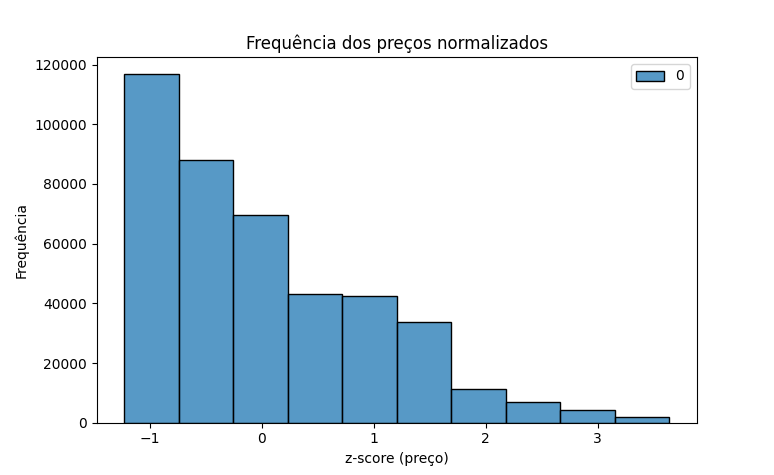

In [40]:
sns.histplot(precos_normalizados, bins=10)
plt.title('Frequência dos preços normalizados')
plt.xlabel('z-score (preço)')
plt.ylabel('Frequência')
plt.show()

<IPython.core.display.Javascript object>


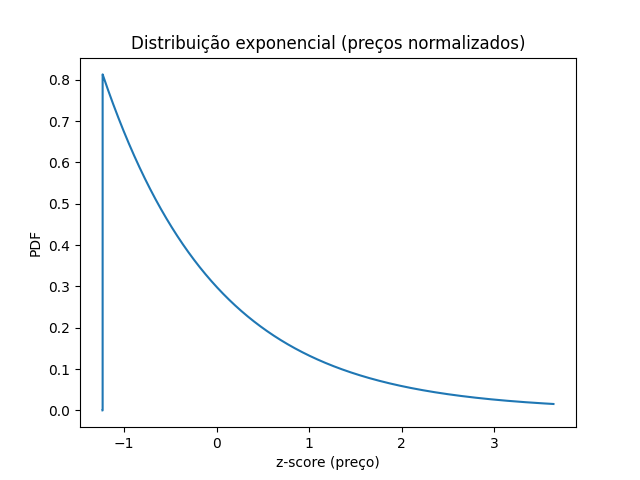

In [41]:
plt.plot(precos_normalizados, scipy.stats.expon.pdf(precos_normalizados, -1.23, 1.23))
plt.title('Distribuição exponencial (preços normalizados)')
plt.xlabel('z-score (preço)')
plt.ylabel('PDF')
plt.show()

In [42]:
# deslocar para direita ( >= 0)
__ = abs(precos_normalizados.min())
_ = [p + __ for p in precos_normalizados]

<IPython.core.display.Javascript object>


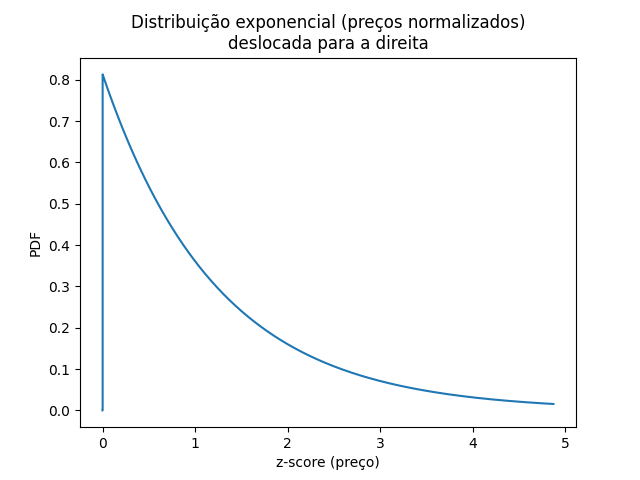

In [43]:
plt.plot(_, scipy.stats.expon.pdf(precos_normalizados, -1.23, 1.23))
plt.title('Distribuição exponencial (preços normalizados)\ndeslocada para a direita')
plt.xlabel('z-score (preço)')
plt.ylabel('PDF')
plt.show()

## Distribuição Beta

<IPython.core.display.Javascript object>


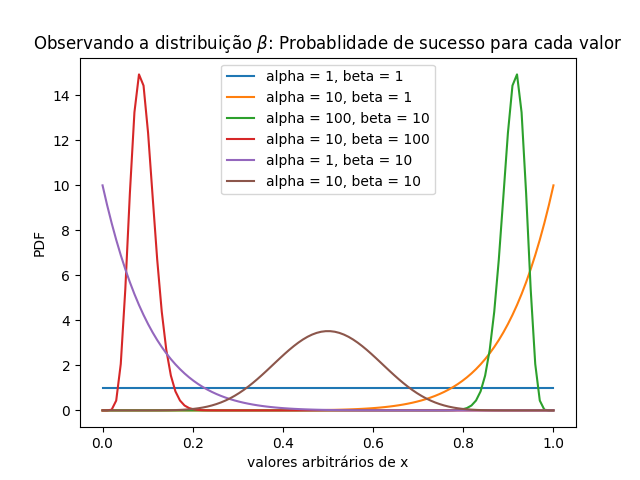

In [3]:
_alfas = [1, 10, 100, 10, 1, 10]
_betas = [1, 1, 10, 100, 10, 10]

x = np.linspace(0, 1, 100)

for _a, _b in zip(_alfas, _betas):
    plt.plot(x, stats.beta(_a, _b).pdf(x))
    plt.xlabel('valores arbitrários de x')
    plt.ylabel('PDF')

plt.title(r'Observando a distribuição $\beta$: Probablidade de sucesso para cada valor')
plt.legend([f'alpha = {_a}, beta = {_b}' for _a,_b in zip(_alfas, _betas)])

plt.show()

Suponha, assumindo uma distribuição de _Bernoulli_:

$NumCaras = \alpha -1$

$NumCoroas = \beta - 1$

In [4]:
def simular_jogadas(alfa: int, beta: int, p_bernoulli: float, num_iter: int):
    """
    Iremos retornar DataFrames relativos tanto a `alfa` quanto a `beta` sendo o caso de sucesso
    """
    
    a = alfa
    b = beta
    
    df_a = pd.DataFrame({"a": [a], "b": [b]})
    df_b = pd.DataFrame({"a": [a], "b": [b]})
    
    for _ in range(num_iter):
        if np.random.rand() < p_bernoulli: # sucesso
            # cenário alfa favorável
            a, b = df_a.iloc[-1].values
            a += 1
            df_a = df_a.append({'a': a, 'b': b}, ignore_index=True)
            # cenário beta favorável
            a, b = df_b.iloc[-1].values
            b += 1
            df_b = df_b.append({'a': a, 'b': b}, ignore_index=True)
        else: # falha
            # cenário alfa favorável
            a, b = df_b.iloc[-1].values
            b += 1
            df_a = df_a.append({'a': a, 'b': b}, ignore_index=True)
            # cenário beta favorável
            a, b = df_a.iloc[-1].values
            a += 1
            df_b = df_b.append({'a': a, 'b': b}, ignore_index=True)
            
    return df_a, df_b

Situação: `Alfa` favorável

<IPython.core.display.Javascript object>


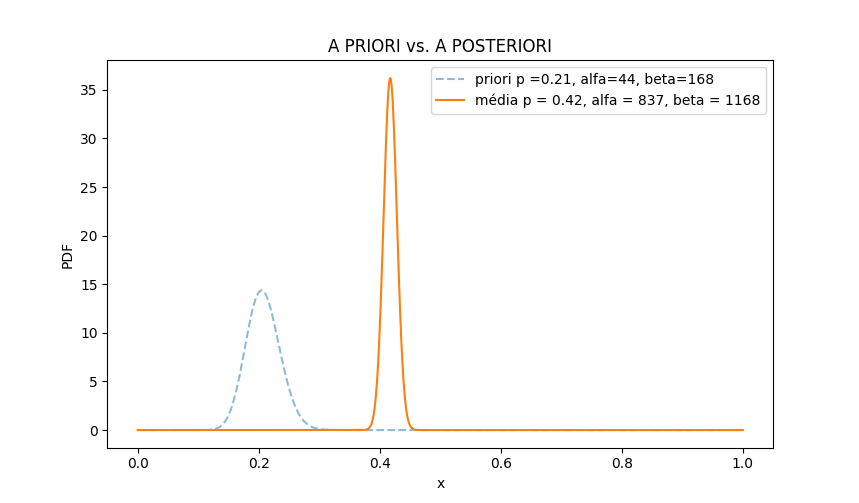

In [5]:
_a = 44
_b = 168
_p = 0.2
_n = 1000

x = np.linspace(0, 1, _n)

dfa, dfb = simular_jogadas(alfa=_a, beta=_b, p_bernoulli=_p, num_iter=_n)

sns.lineplot(x=x, y=stats.beta(_a, _b).pdf(x), alpha=0.5, linestyle='--')

a, b = dfa.iloc[-1].values
sns.lineplot(x=x, y=stats.beta(a, b).pdf(x))

plt.title('A PRIORI vs. A POSTERIORI')
plt.legend([f'priori p ={_a/(_a+_b):.2f}, alfa={_a}, beta={_b}',
           f'média p = {a/(a+b):.2f}, alfa = {a}, beta = {b}'])
plt.xlabel('x')
plt.ylabel('PDF')

plt.show()

A distribuição _a posteriori_ também é uma distribuição $\beta$.

- Este processo pode ser feito de forma iterativa tomando a saída (_a posteriori_) como a entrada (_a priori_) para a próxima iteração.

<IPython.core.display.Javascript object>


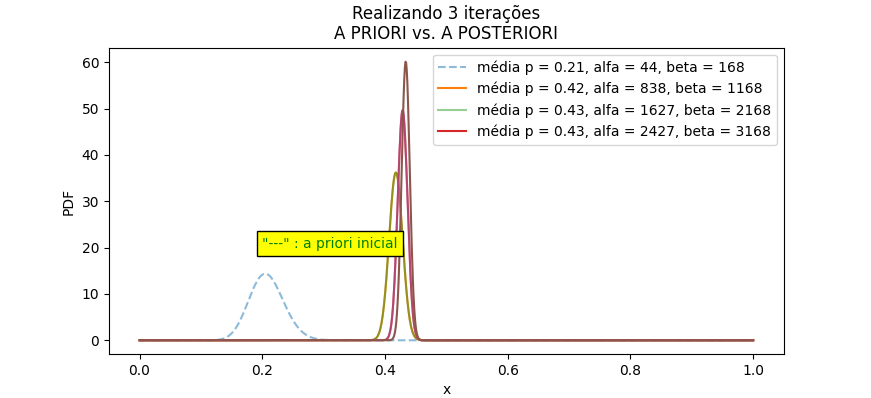

In [8]:
def loop_simular_jogadas(rounds: int, ini_a: int, ini_b: int, p: float, iteracoes_round: int):

        _a = ini_a
        _b = ini_b
        _p = p
        _n = iteracoes_round
        
        acc_a_b = [(ini_a, ini_b)]
    
        for _ in range(rounds):
            dfa, dfb = simular_jogadas(alfa=_a, beta=_b, p_bernoulli=_p, num_iter=_n)

            x = np.linspace(0, 1, _n)
            if _ == 0:
                linestyle='--'
            else:
                linestyle='solid'
            sns.lineplot(x=x, y=stats.beta(_a, _b).pdf(x), alpha=0.5, linestyle=linestyle)

            a, b = dfa.iloc[-1].values
#             print(f'a = {a}, b = {b}')
            sns.lineplot(x=x, y=stats.beta(a, b).pdf(x))

            acc_a_b.append((a, b))
            _a, _b = a, b

        plt.title(f'Realizando {rounds} iterações\nA PRIORI vs. A POSTERIORI')
        plt.xlabel('x')
        plt.ylabel('PDF')
        
        _ = [f'média p = {a/(a+b):.2f}, alfa = {a}, beta = {b}' for a,b in acc_a_b]
        plt.legend(_)
        plt.text(x=0.2, y=20, s='"---" : a priori inicial',
                 backgroundcolor='yellow',
                 fontdict=dict(color='green',size=10),
                 bbox=dict(facecolor='yellow')
        )
        plt.show()
        return dict(zip([f'round_{_}' for _ in range(rounds)], acc_a_b))

_ = loop_simular_jogadas(3, 44, 168, 0.2, 1000)

___
## # Aula 03 - 14/09/2021

## Inferência Baysiana manual

Regra de Bayes:

$p(\theta|dado) = \frac{p(dado|\theta)p(\theta)}{p(dado)}$

onde,

- $\theta$: parâmetro;
- $p(\theta)$: **a priori**, relacionado a hipótese assumida;
- $p(dado|\theta)$: **evidência** (verossimilhança), relacionado à probabilidade do dado ocorrer se o parâmetro for $\theta$;
    - e.g: Qual a probabiliadde de termos uma determinada amostra de dados **se** a chance de um determinado evento, para cada registro, ocorrer for $\theta$?
- $p(dado)$: fator de normalização (verossimilhança marginal);
- $p(\theta|dado)$: **a posteriori**, nossa hipótese atualizada considerando a ocorrência do dado

In [69]:
# 𝜃 inicial
clap_prob = 0.3

In [70]:
# P(𝜃)
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

A crença é de que existe 30% de chance de sucesso ('parabéns') para cada visitante. Vamos refiná-la:

In [74]:
alfa = 400
beta = 2000 - alfa

# valores possíveis para 𝜃
teta_range = np.linspace(0, 1, 1000) 

<IPython.core.display.Javascript object>


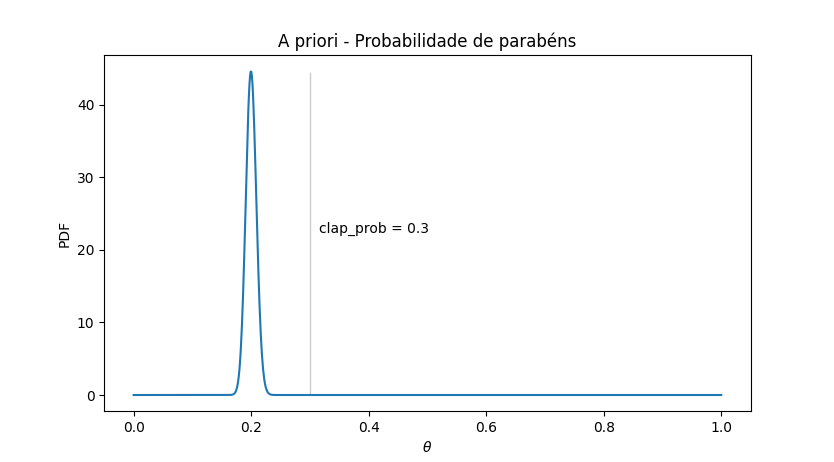

In [105]:
# distribução beta que representa o caso dos 400 parabéns em 2000 visitas
priori = stats.beta.pdf(x=teta_range, a=alfa, b=beta)
sns.lineplot(x=teta_range, y=priori)
plt.title('A priori - Probabilidade de parabéns')
plt.ylabel('PDF')
plt.xlabel(r'$\theta$')
plt.text(x=clap_prob*1.05, y=sum([0, max(priori)])/2, s=f'clap_prob = {clap_prob}',
         backgroundcolor='white',
         fontdict=dict(color='black',size=10)
        )
sns.lineplot(x=clap_prob, y=[0, max(priori)], linestyle='dashed', color='black')
plt.show()

Portanto, temos a que maior chance é de termos um $\theta \approx 0.2$ para modelar esses dados.

Agora, observando a amostra como um todo, perceba que ela consiste de uma sequência de $n$ experimentos Bernoulli nos dá uma distribuição binomial.

Ou seja: _Dado um número $n$ de visitantes, qual a probablilidade de receber $p$ parabéns?_

Assim, nosso $p(dado|\theta)$ é dado por uma distribuição binomial:

In [106]:
# a priori: 𝛼,𝛽
likelihood = stats.binom.pmf(k=np.sum(clap_data), n=len(clap_data), p=(alfa/(alfa+beta)))

print(f'Pouco provável. A probabilidade é de {likelihood*100:.4f}%')

Pouco provável. A probabilidade é de 0.0000%


Asim, vamos testar para todos os valores de $0 \le \theta \le 1$:

<IPython.core.display.Javascript object>


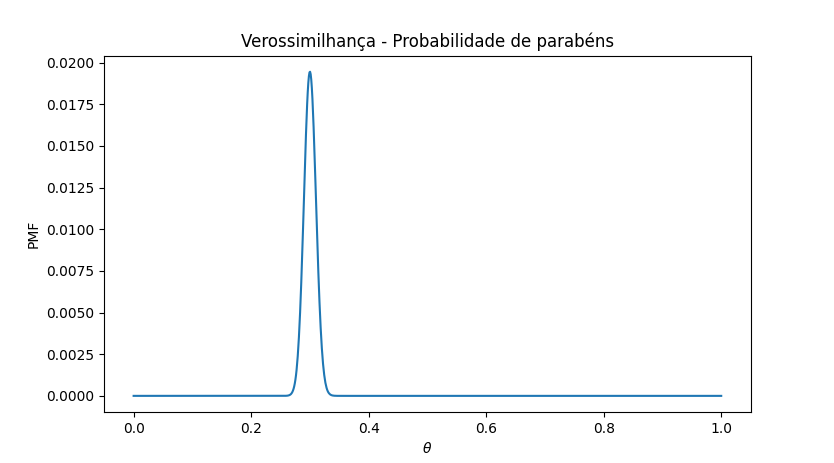

In [107]:
likelihood = stats.binom.pmf(k=np.sum(clap_data), n=len(clap_data), p=theta_range)

sns.lineplot(x=teta_range, y=likelihood)
plt.title('Verossimilhança - Probabilidade de parabéns')
plt.ylabel('PMF')
plt.xlabel(r'$\theta$')
plt.show()

Portanto, temos é mais provável que tenhamos um $\theta \approx 0.3$ para modelar esses dados.

Como a distribuição $\beta$ é contínua e a binomial é _discreta_, vamos transformar a _P.D.F._ da $\beta$ em um histograma, para poder subtrair as áreas.

Uma vez que a _P.D.F._ dá a densidade e a _P.M.F._ nos tá o exato valor da probablidade, iremos calcular uma _C.D.F._, para transformar a densidade em probabilidade.

In [108]:
theta_range_e = theta_range + 0.001

priori_cdf = \
    stats.beta.cdf(x=theta_range_e, a=alfa, b=beta) \
    - stats.beta.cdf(x=theta_range, a=alfa, b=beta)

posteriori = likelihood * priori_cdf

len(posteriori)

1000

<IPython.core.display.Javascript object>


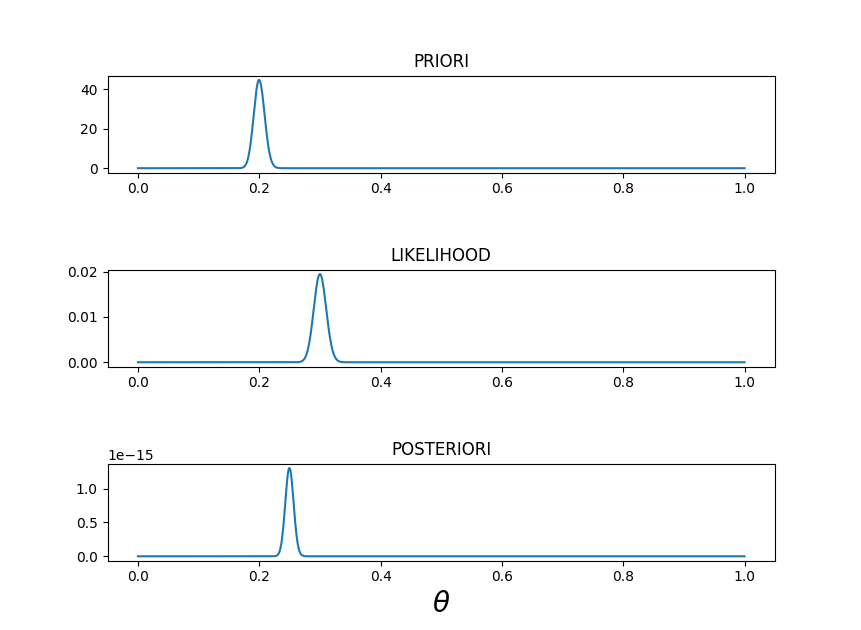

In [113]:
nrows, ncols, nindex = 3, 1, 1

for resultado,titulo in zip([priori, likelihood, posteriori], 'priori likelihood posteriori'.split()):
    plt.subplot(nrows, ncols, nindex)
    sns.lineplot(x=theta_range, y=resultado)
    plt.title(titulo.upper())
    nindex += 1

plt.xlabel(r'$\theta$', fontsize=20)
plt.subplots_adjust(wspace=0.25, hspace=1)
plt.show()

Observe que a medida que exploramos, o posteriori se desloca do $\theta$ inicial e se em direção ao valor no caso da verossimilhança (_likelihood_).

Assim, podemos assumir com certa confiança de que devemos ter um valor $\theta \approx 0.25$.

### Alturas

<IPython.core.display.Javascript object>


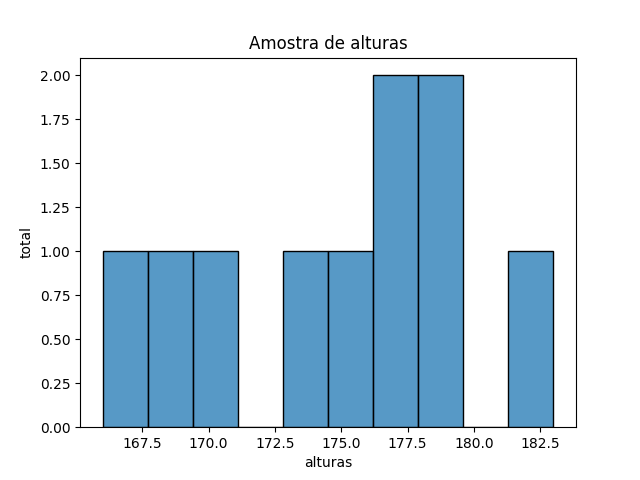

In [119]:
X = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
sns.histplot(x=X, bins=len(X))
plt.title('Amostra de alturas')
plt.xlabel('alturas')
plt.ylabel('total')
plt.show()

Vamos assumir que o modelo mais próximo dos nosso dados seria uma distribuição normal.

In [129]:
_ = np.array(X)
media = round(_.mean()) # 𝜇
dpadrao = round(_.std()) # 𝛿

media, dpadrao

(175, 5)

In [126]:
x = np.linspace(150.0, 200.0, 501)

<IPython.core.display.Javascript object>


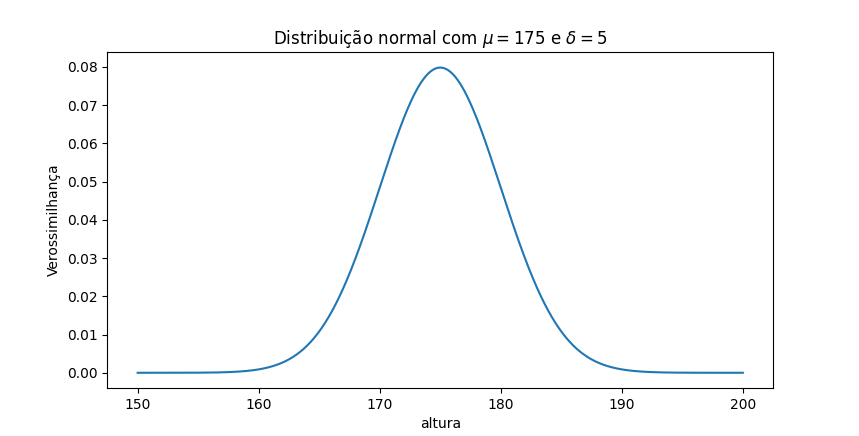

In [137]:
# verossimilhança entre a dist. normal e nossa amostra
likelihood = scipy.stats.norm.pdf(x, media, dpadrao)
sns.lineplot(x=x, y=likelihood)
plt.title(r'Distribuição normal com $\mu = {}$ e $\delta = {}$'.format(media, dpadrao))
plt.xlabel('altura')
plt.ylabel('Verossimilhança')
plt.show()

A gaussiana nos diz que a $(\mu, \sigma) \approx (1.75; 5)$.

Vamos analisar a média e o desvio padrão para representar nosso modelo de dados (verossimilhança).

`A priori`:

<IPython.core.display.Javascript object>


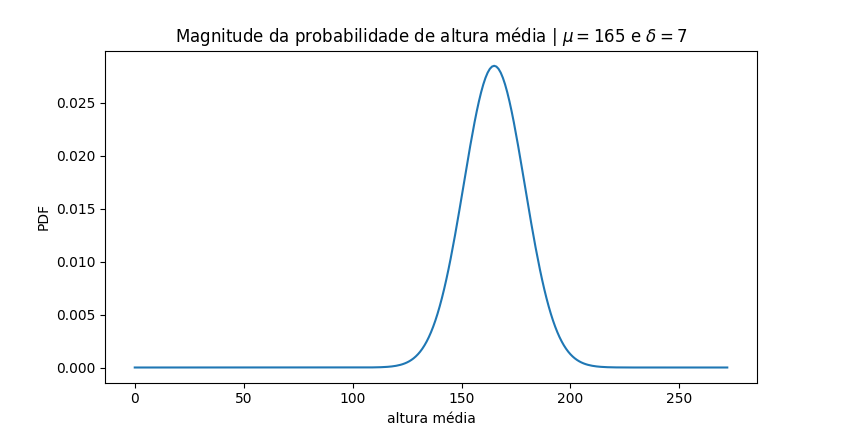

In [143]:
altura_mundial_media = 165
altura_mundial_std = 7

alturas = np.linspace(0, 272, 273)

pdf_alturas = stats.norm.pdf(alturas, altura_mundial_media, 2*altura_mundial_std)

sns.lineplot(x=alturas, y=pdf_alturas)
plt.title(r'Magnitude da probabilidade de altura média | $\mu = {}$ e $\delta = {}$'.format(
    altura_mundial_media, altura_mundial_std))
plt.xlabel('altura média')
plt.ylabel('PDF')
plt.show()

`A posteriori`:

- Variância fixa e média variável:

<IPython.core.display.Javascript object>


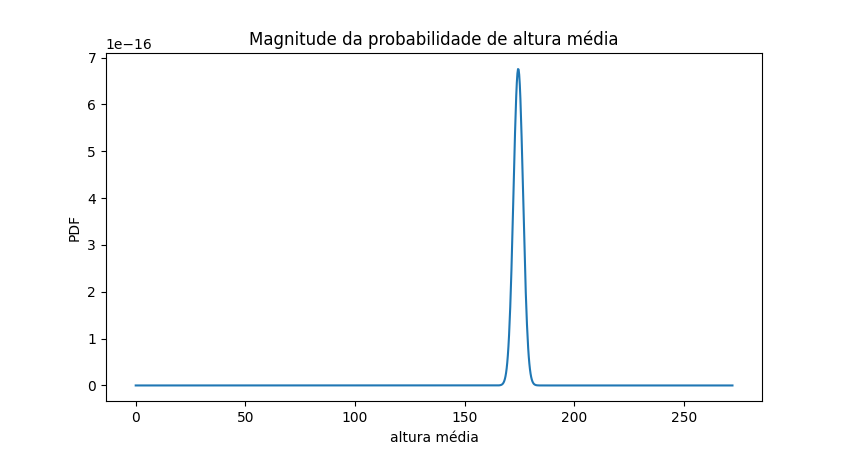

In [146]:
altura_mundial_media = 165
altura_mundial_std = 7

medias_possiveis = np.linspace(0., 272, 1000)
dpadrao = 7


def posteriori(m, d, x):
    m_priori = stats.norm.logpdf(m, altura_mundial_media, 2*altura_mundial_std)
    return m_priori + stats.norm.logpdf(x, m, d).sum()


def calcula_posterioris(x):
    for m in medias_possiveis:
        yield posteriori(m, dpadrao, x)


posterioris = list(calcula_posterioris(X))

sns.lineplot(x=medias_possiveis, y=np.exp(posterioris))
plt.title('Magnitude da probabilidade de altura média')
plt.xlabel('altura média')
plt.ylabel('PDF')
plt.show()

- Média fixa e variância e variável:

<IPython.core.display.Javascript object>


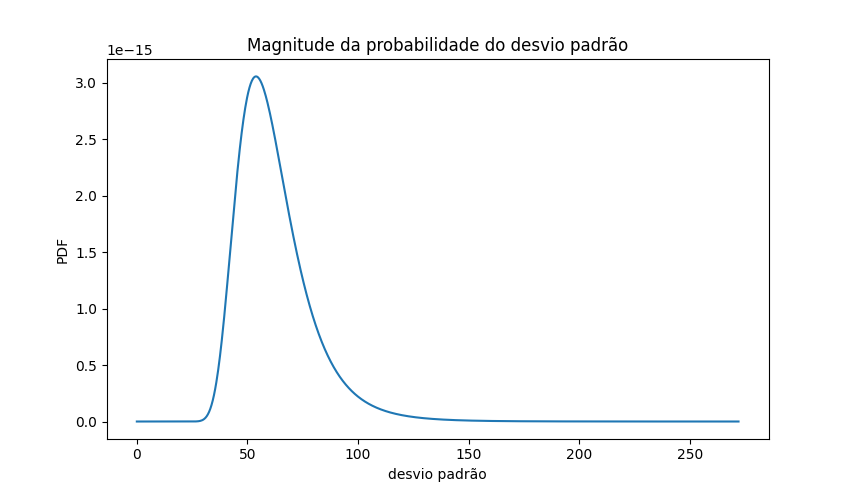

In [147]:
min_dpadrao, max_dpadrao = 0.01, 25.0

dpadrao_possiveis = np.linspace(min_dpadrao, max_dpadrao, 1000)
media_altura = 175

def posteriori(m, d, x):
    d_priori = stats.uniform.logpdf(d, min_dpadrao, max_dpadrao)
    return d_priori + stats.norm.logpdf(x, m, d).sum()


def calcula_posterioris(x):
    for d in dpadrao_possiveis:
        yield posteriori(media_altura, d, x)


posterioris = list(calcula_posterioris(X))

sns.lineplot(x=medias_possiveis, y=np.exp(posterioris))
plt.title('Magnitude da probabilidade do desvio padrão')
plt.xlabel('desvio padrão')
plt.ylabel('PDF')
plt.show()

- 2D Grid:

CPU times: user 4min 22s, sys: 0 ns, total: 4min 22s
Wall time: 4min 22s
A média mais provável: 174.53
O desvio padrão mais provável: 4.94


<IPython.core.display.Javascript object>


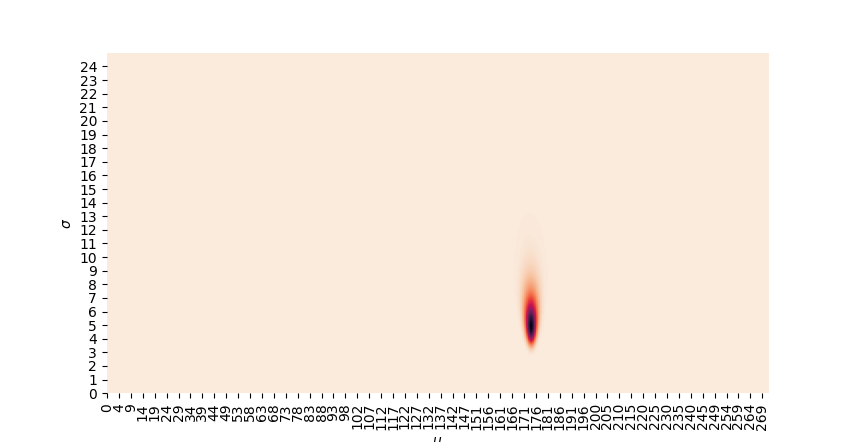

In [149]:
x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
world_height_mean = 165
world_height_standard_deviation = 7
min_sigma = .01
max_sigma = 25.
mu_candidates = np.linspace(0., 272, 1000)
sigma_candidates = np.linspace(min_sigma, max_sigma, 1000)

def posterior(mu, sigma, x):
    mu_prior = stats.norm.logpdf(mu, world_height_mean, world_height_standard_deviation * 2)
    sigma_prior = stats.uniform.logpdf(sigma, min_sigma, max_sigma)
    return mu_prior + sigma_prior + stats.norm.logpdf(x, mu, sigma).sum()

def compute_posteriors(mu_candidates, sigma_candidates, x):
    for mu in mu_candidates:
        for sigma in sigma_candidates:
            yield mu, sigma, posterior(mu, sigma, x)

%time results = list(compute_posteriors(mu_candidates, sigma_candidates, x))
results = pd.DataFrame(results, columns=('mu', 'sigma', 'posterior')).set_index(['mu', 'sigma'])['posterior']

best_mu, best_sigma = results.idxmax('posterior')
print('A média mais provável: %.2f\nO desvio padrão mais provável: %.2f' % (best_mu, best_sigma))

# Converting index to int, for the plot axis (seaborn has a bug with set_major_formatter)
heatmap_results = -np.exp(results.unstack(-1))
heatmap_results.index = heatmap_results.index.astype(int)
heatmap_results = heatmap_results.T
heatmap_results.index = heatmap_results.index.astype(int)

ax = seaborn.heatmap(heatmap_results,
                     xticklabels=18,
                     yticklabels=40,
                     cbar=False)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
ax.invert_yaxis()

- [x] Utilizando bibliotecas

In [152]:
import pymc3

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<timed exec>:1: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [height_standard_deviation, height_mean]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.


CPU times: user 5.68 s, sys: 769 ms, total: 6.45 s
Wall time: 40.2 s


<ipython-input-153-d445c359ad4b>:16: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pymc3.traceplot(traces)
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<IPython.core.display.Javascript object>


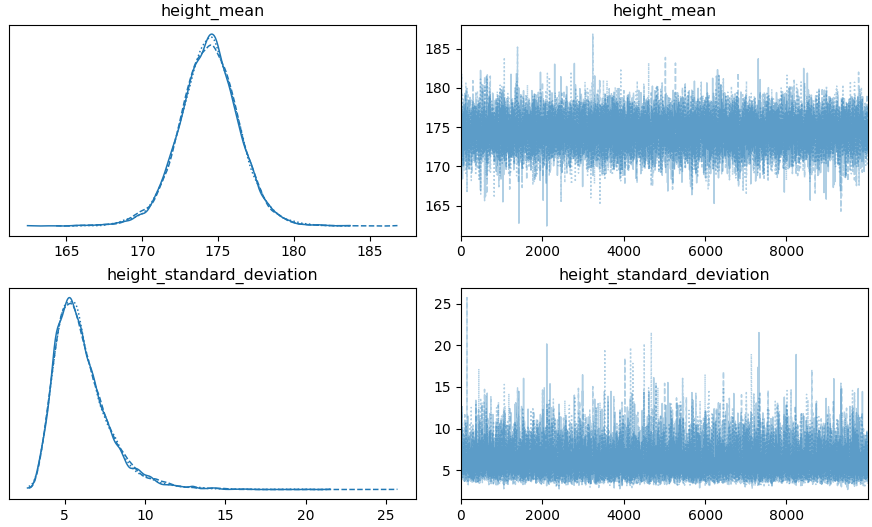

array([[<AxesSubplot:title={'center':'height_mean'}>,
        <AxesSubplot:title={'center':'height_mean'}>],
       [<AxesSubplot:title={'center':'height_standard_deviation'}>,
        <AxesSubplot:title={'center':'height_standard_deviation'}>]],
      dtype=object)

In [153]:
x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

world_height_mean = 165
world_height_standard_deviation = 7

with pymc3.Model() as model:
    height_mean = pymc3.Normal('height_mean', world_height_mean, world_height_standard_deviation * 2)
    height_standard_deviation = pymc3.Uniform('height_standard_deviation', 0., world_height_standard_deviation * 5)
    python_programmers_height = pymc3.Normal('python_programmers_height',
                                             height_mean,
                                             height_standard_deviation,
                                             observed=x)

    %time traces = pymc3.sample(10000, step=pymc3.NUTS())

pymc3.traceplot(traces)

In [154]:
import arviz as az

In [155]:
tosses = [
    1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
    0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 1, 0, 1, 0
]

In [158]:
with pymc3.Model() as model:
    # defina o a priori
    theta = pymc3.Beta('theta', 2, 2)

    # defina a evidência
    data = pymc3.Bernoulli('data', theta, observed=tosses)

    # coleta as amostras
    trace = pymc3.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [theta]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 1 seconds.


In [159]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

<IPython.core.display.Javascript object>


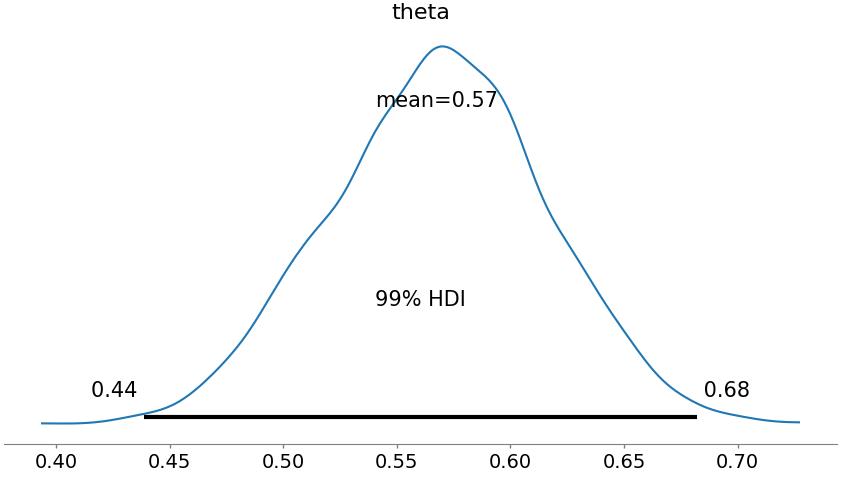

<AxesSubplot:title={'center':'theta'}>

In [160]:
az.plot_posterior(trace, hdi_prob=0.99)

___
## # Aula 04 - 21/09/2021

## Autoencoders

In [3]:
from keras import backend as K
from keras.datasets import mnist, cifar10
from keras.models import Model, Sequential
from keras.losses import mse, binary_crossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda,\
    InputLayer, Flatten, Reshape, Conv2DTranspose

### Denoising

In [4]:
(xtrain, _), (xtest, _) = mnist.load_data()

xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
NUM, H, W = xtrain.shape
DIM = H * W

xtrain = xtrain.reshape(NUM, H, W, 1)

NUM, _, _ = xtest.shape
xtest = xtest.reshape(NUM, H, W, 1)

xtrain.shape, xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [7]:
RUIDO = 0.5

In [8]:
def add_ruido(x):
    return x + RUIDO * np.random.normal(loc=0, scale=1.0, size=x.shape)

In [9]:
xtrain_noisy = add_ruido(xtrain)
xtest_noisy = add_ruido(xtest)

In [10]:
CLIP_MIN, CLIP_MAX =  0.0, 1.0

In [11]:
xtrain_noisy_clipped = np.clip(a=xtrain_noisy, a_min=CLIP_MIN, a_max=CLIP_MAX)
xtest_noisy_clipped = np.clip(a=xtest_noisy, a_min=CLIP_MIN, a_max=CLIP_MAX)

<IPython.core.display.Javascript object>


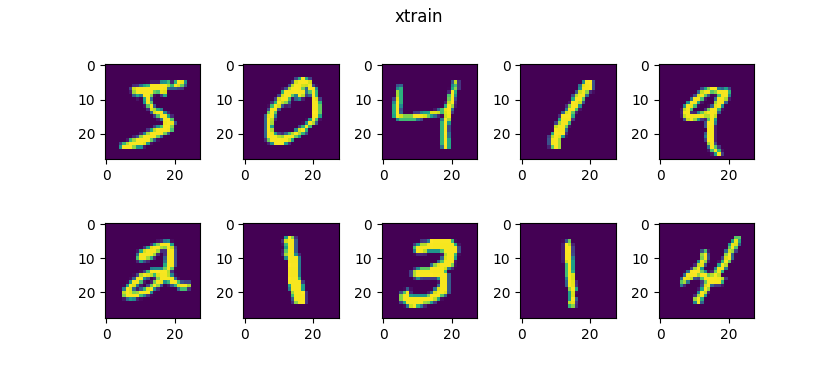

In [12]:
nrows, ncols, nindex = 2, 5, 1

for img in xtrain[:10]:
    plt.subplot(nrows, ncols, nindex)
    plt.imshow(img.reshape(H, W))
#     plt.gray()
    nindex += 1

plt.suptitle('xtrain')
plt.subplots_adjust(wspace=0.45)
plt.show()

<IPython.core.display.Javascript object>


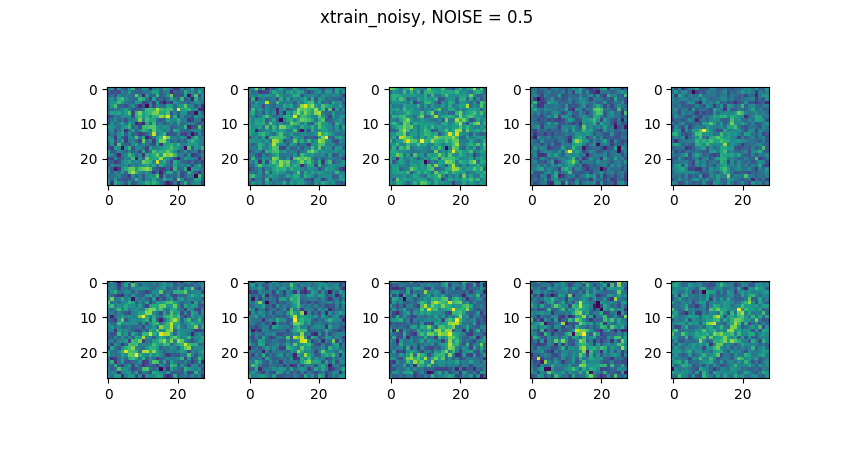

In [13]:
nrows, ncols, nindex = 2, 5, 1

for img in xtrain_noisy[:10]:
    plt.subplot(nrows, ncols, nindex)
    plt.imshow(img.reshape(H, W))
    nindex += 1

plt.suptitle(f'xtrain_noisy, NOISE = {RUIDO}')
plt.subplots_adjust(wspace=0.45)
plt.show()

<IPython.core.display.Javascript object>


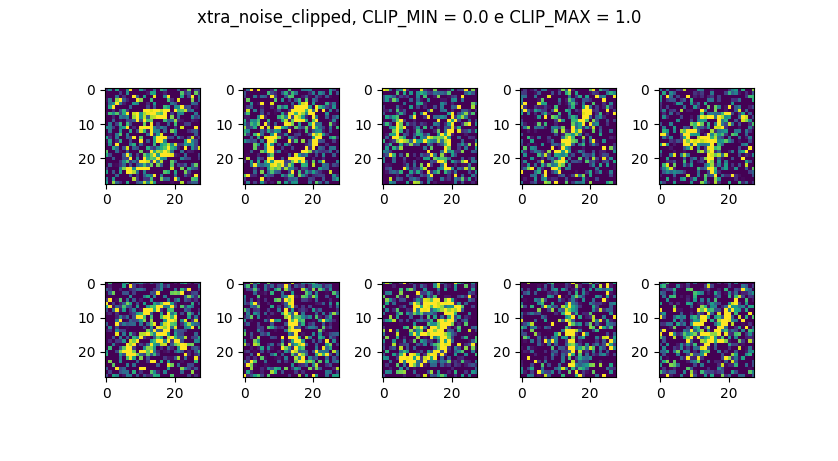

In [14]:
nrows, ncols, nindex = 2, 5, 1

for img in xtrain_noisy_clipped[:10]:
    plt.subplot(nrows, ncols, nindex)
    plt.imshow(img.reshape(H, W))
    nindex += 1

plt.suptitle(f'xtra_noise_clipped, CLIP_MIN = {CLIP_MIN} e CLIP_MAX = {CLIP_MAX}')
plt.subplots_adjust(wspace=0.45)
plt.show()

In [50]:
def autoencoder_mnist():
    K.clear_session()
    model = Sequential()

    # input
    model.add(InputLayer(input_shape=(H, W, 1)))

    # encoder - perda de informação
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) # encoded

    # decoder - reconstrução do espaço latente
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(UpSampling2D(size=(2, 2))) 
    model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same')) # decoded

    model.compile(optimizer='adadelta', loss='binary_crossentropy')
    print(model.summary())
    return model

autoencoder_mnist = autoencoder_mnist()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9

In [10]:
es = EarlyStopping(monitor='loss',
                   min_delta=1e-10,
                   patience=5, verbose=1)

mcp = ModelCheckpoint(filepath='cifar10-autoencoder-weights.h5',
                      save_best_only=True,
                      monitor='loss',
                      verbose=1)

In [52]:
autoencoder_mnist.fit(x=xtrain_noisy_clipped, y=xtrain,
                      epochs=10, batch_size=120,
                      validation_data=(xtest_noisy_clipped, xtest),
                      callbacks=[es, mcp])

Epoch 1/10
500/500 [==============================] - 38s 74ms/step - loss: 0.6816 - val_loss: 0.4176

Epoch 00001: loss improved from inf to 0.54772, saving model to cifar10-autoencoder-weights.h5
Epoch 2/10
500/500 [==============================] - 37s 74ms/step - loss: 0.3889 - val_loss: 0.3481

Epoch 00002: loss improved from 0.54772 to 0.37099, saving model to cifar10-autoencoder-weights.h5
Epoch 3/10
500/500 [==============================] - 37s 75ms/step - loss: 0.3369 - val_loss: 0.3230

Epoch 00003: loss improved from 0.37099 to 0.33109, saving model to cifar10-autoencoder-weights.h5
Epoch 4/10
500/500 [==============================] - 37s 74ms/step - loss: 0.3158 - val_loss: 0.3055

Epoch 00004: loss improved from 0.33109 to 0.31151, saving model to cifar10-autoencoder-weights.h5
Epoch 5/10
500/500 [==============================] - 37s 74ms/step - loss: 0.2998 - val_loss: 0.2893

Epoch 00005: loss improved from 0.31151 to 0.29570, saving model to cifar10-autoencoder-weigh

In [54]:
pred = autoencoder_mnist.predict(xtest_noisy_clipped)

In [55]:
xtest.shape, xtest_noisy_clipped.shape, pred.shape, 

((10000, 28, 28, 1), (10000, 28, 28, 1), (10000, 28, 28, 1))

<IPython.core.display.Javascript object>


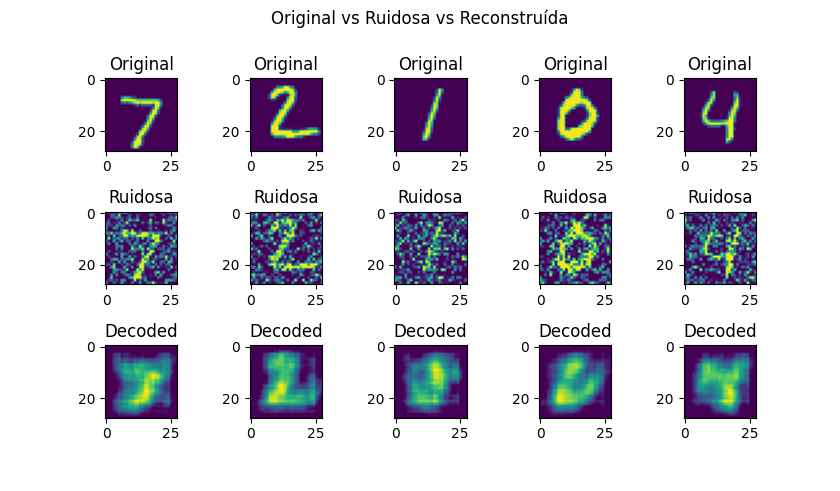

In [90]:
nrows, ncols, nindex = 3, 5, 1

for _ in range(ncols):
    plt.subplot(nrows, ncols, _ + 1)
    plt.title('Original')
    plt.imshow(xtest[_])

    plt.subplot(nrows, ncols, _ + 1 + ncols)
    plt.title('Ruidosa')
    plt.imshow(xtest_noisy_clipped[_])

    plt.subplot(nrows, ncols, _ + 1 + 2*ncols)
    plt.title('Decoded')
    plt.imshow(pred[_])

plt.subplots_adjust(wspace=1)
plt.suptitle('Original vs Ruidosa vs Reconstruída')
plt.show()

### Information Retrieval

In [4]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
classes = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
]
classes = dict(zip(range(len(classes)), classes))
classes

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

<IPython.core.display.Javascript object>


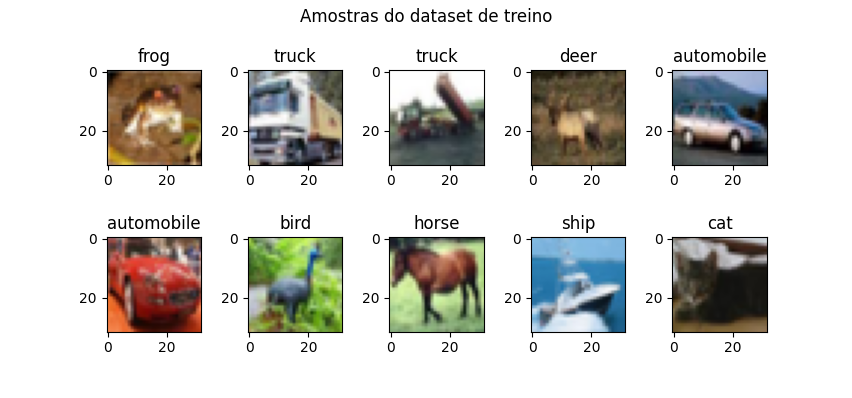

In [119]:
_ = 1
for i in range(10):
    plt.subplot(2, 5, _)
    plt.imshow(xtrain[i])
    plt.title(f'{classes[ytrain[i, 0]]}')
    _ += 1

plt.suptitle('Amostras do dataset de treino')
plt.subplots_adjust(wspace=0.5)
plt.show()

In [6]:
xtrain = xtrain.astype('float32')/255 - 0.5
xtest = xtest.astype('float32')/255 - 0.5

In [7]:
def autoencoder_cifar10(img_shape: tuple, code_size: int):
    """
    code_size = dim do espaço latente
    """
    K.clear_session()

    H, W, C = img_shape

    # encoder
    encoder = Sequential()
    encoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same',
               input_shape=(img_shape)))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Flatten())
    encoder.add(Dense(units=code_size))

    # decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(2*2*256)) # expandir
    decoder.add(Reshape((2, 2, 256))) # reshape
    decoder.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

encoder, decoder = autoencoder_cifar10(img_shape=xtrain.shape[1:], code_size=32)

In [145]:
# encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [143]:
# decoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              33792     
_________________________________________________________________
reshape_3 (Reshape)          (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 4, 4, 128)         295040    
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 8, 8, 64)          73792     
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 32, 32, 3)         867       
Total params: 421,955
Trainable params: 421,955
Non-trainable params: 0
_______________________________________________

In [8]:
inp = Input(shape=xtrain.shape[1:])
enc = encoder(inp)
rebuild = decoder(enc)

autoencoder_cifar10 = Model(inputs=inp, outputs=rebuild)
autoencoder_cifar10.compile(optimizer="adamax", loss='mse')

In [12]:
autoencoder_cifar10.fit(x=xtrain, y=xtrain, epochs=25, callbacks=[es, mcp])

Epoch 1/25
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0118

Epoch 00001: loss improved from 0.01187 to 0.01175, saving model to cifar10-autoencoder-weights.h5
Epoch 2/25
1563/1563 [==============================] - 40s 25ms/step - loss: 0.0117

Epoch 00002: loss improved from 0.01175 to 0.01170, saving model to cifar10-autoencoder-weights.h5
Epoch 3/25
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0117

Epoch 00003: loss improved from 0.01170 to 0.01165, saving model to cifar10-autoencoder-weights.h5
Epoch 4/25
1563/1563 [==============================] - 41s 26ms/step - loss: 0.0116

Epoch 00004: loss improved from 0.01165 to 0.01161, saving model to cifar10-autoencoder-weights.h5
Epoch 5/25
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0116

Epoch 00005: loss improved from 0.01161 to 0.01156, saving model to cifar10-autoencoder-weights.h5
Epoch 6/25
1563/1563 [==============================] - 41s 26ms/step - los

In [13]:
def visualize(img,encoder,decoder):
    """Mostra a imagem original, codificada e decodificada"""
    code = encoder.predict(img[None])[0]  # img[None] é o mesmo que img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

In [14]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

Convolutional autoencoder MSE: 0.011372674256563187


<IPython.core.display.Javascript object>


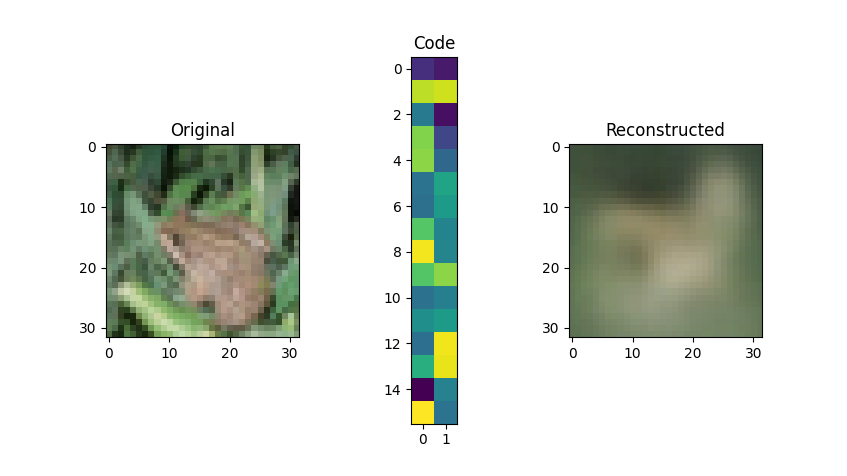

In [15]:
reconstruction_mse = autoencoder_cifar10.evaluate(xtest, xtest, verbose=0)
print("Convolutional autoencoder MSE:", reconstruction_mse)
for i in range(5):
    img = xtest[i]
    visualize(img,encoder,decoder)

In [16]:
images = xtrain
codes = encoder.predict(images)

In [17]:
knn = NearestNeighbors()
knn.fit(codes)

NearestNeighbors()

In [18]:
def get_similar(image, n_neighbors=5):
    code = encoder.predict(image[None])
    (distances,),(idx,) = knn.kneighbors(code,n_neighbors=n_neighbors)
    return distances,images[idx]

In [19]:
def show_similar(image):
    distances,neighbors = get_similar(image,n_neighbors=3)
    plt.subplot(1,4,1)
    show_image(image)
    plt.title("Original image")
    for i in range(3):
        plt.subplot(1,4,i+2)
        show_image(neighbors[i])
        plt.title("Dist=%.3f"%distances[i])
    plt.subplots_adjust(wspace=0.5)
    plt.show()

<IPython.core.display.Javascript object>


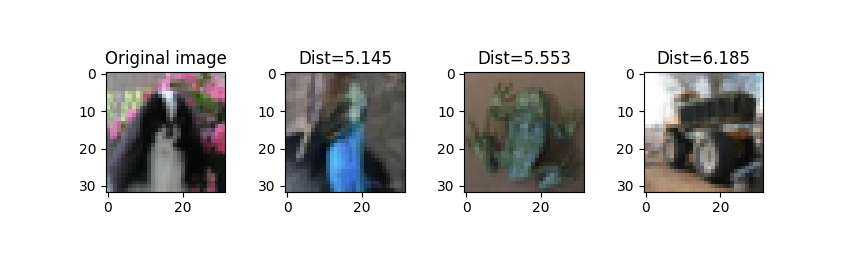

In [22]:
show_similar(xtest[42])

<IPython.core.display.Javascript object>


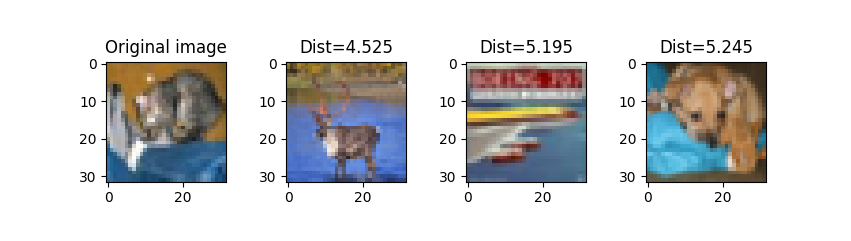

In [23]:
show_similar(xtest[0])

### VAE

___
## # Aula 05 - 28/09/2021